In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1. Load dataset
df = pd.read_csv("teleCust.csv")

# 2. Select features and target
features = ['region', 'tenure', 'age', 'marital', 'address', 'income', 
           'ed', 'employ', 'retire', 'gender', 'reside']
X = df[features]
y = df['custcat']

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# 4. Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Try different values of k
k_range = range(1, 20)
accuracies = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# 6. Find the best k
best_k = k_range[np.argmax(accuracies)]
best_accuracy = max(accuracies)

print("Best k:", best_k)
print("Best Accuracy:", best_accuracy)


Best k: 18
Best Accuracy: 0.38


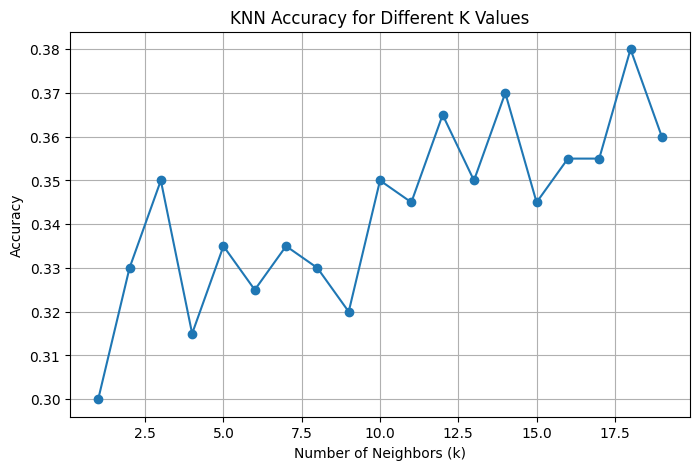

In [2]:
# 7. Plot accuracy vs k
plt.figure(figsize=(8, 5))
plt.plot(k_range, accuracies, marker='o')
plt.title("KNN Accuracy for Different K Values")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()